In [193]:
import json

json_file = '/home/fanfu/newdisk/pytorch-bottom-up-attention/py-bottom-up-attention/demo/relationship_classifier/coco_json.json'
json_info = json.load(open(json_file))

In [194]:
from model.Classifier import Classifier
import torch

model = Classifier()

check_point_file = 'checkpoint/weight_norm/checkpoint_best.pkl'
checkpoint = torch.load(check_point_file)
model.load_state_dict(checkpoint['model_state_dict'])

if torch.cuda.is_available():
    model.cuda()

In [195]:
import numpy as np
import base64

# 'union_box': union_box,
#         'union_feat': union_feat,
#         'obj_box': obj_box_one,
#         'obj_lab': obj_lab,
#         'obj_feat': obj_feat,
#         'sub_box': sub_box_one,
#         'sub_lab': sub_lab,
#         'sub_feat': sub_feat

image_info = json_info['info']
image_path = json_info['image_path']
union_boxes = []
union_feates = []
obj_boxes = []
obj_labes = []
obj_feates = []
sub_boxes = []
sub_labes = []
sub_feates = []

for i in range(len(image_info)):
    info = image_info[i]
    union_box = info['union_box']
    union_feat = np.frombuffer(base64.b64decode(info['union_feat']), dtype=np.float32)
    obj_box = info['obj_box']
    obj_lab = info['obj_lab']
    obj_feat = np.frombuffer(base64.b64decode(info['obj_feat']), dtype=np.float32)
    sub_box = info['sub_box']
    sub_lab = info['sub_lab']
    sub_feat = np.frombuffer(base64.b64decode(info['sub_feat']), dtype=np.float32)

    union_boxes.append(union_box)
    union_feates.append(union_feat)
    obj_boxes.append(obj_box)
    obj_labes.append(obj_lab)
    obj_feates.append(obj_feat)
    sub_boxes.append(sub_box)
    sub_labes.append(sub_lab)
    sub_feates.append(sub_feat)


In [196]:
union_feates

[array([0.23715651, 0.9433472 , 0.01578966, ..., 0.07133585, 0.02826695,
        0.11342422], dtype=float32),
 array([0.16799407, 0.        , 0.        , ..., 0.        , 0.        ,
        1.2087903 ], dtype=float32),
 array([0.39452952, 3.4437728 , 0.        , ..., 0.4957217 , 0.14511079,
        0.41756743], dtype=float32),
 array([0.19135535, 0.00118622, 0.        , ..., 0.10144456, 0.04184184,
        0.04166316], dtype=float32),
 array([0.30900994, 2.0405304 , 0.        , ..., 0.23296076, 0.07748119,
        0.21361399], dtype=float32),
 array([0.2795867 , 0.8599788 , 0.        , ..., 0.12157063, 0.03700888,
        0.00405034], dtype=float32),
 array([0.17904937, 0.5420911 , 0.        , ..., 0.19627693, 0.03865522,
        0.2566    ], dtype=float32),
 array([0.3723945 , 0.69103116, 0.        , ..., 0.24891402, 0.10028537,
        0.        ], dtype=float32),
 array([0.3165356 , 2.6789691 , 0.        , ..., 0.5864642 , 0.00917789,
        0.4306691 ], dtype=float32),
 array([0.

In [197]:
torch.from_numpy(np.asarray(union_feates))

tensor([[2.3716e-01, 9.4335e-01, 1.5790e-02,  ..., 7.1336e-02, 2.8267e-02,
         1.1342e-01],
        [1.6799e-01, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         1.2088e+00],
        [3.9453e-01, 3.4438e+00, 0.0000e+00,  ..., 4.9572e-01, 1.4511e-01,
         4.1757e-01],
        ...,
        [3.3369e-02, 2.4964e+00, 0.0000e+00,  ..., 4.9151e-01, 3.2146e-01,
         0.0000e+00],
        [4.4716e-03, 1.4106e+01, 1.2624e-01,  ..., 2.6577e-01, 0.0000e+00,
         0.0000e+00],
        [3.2546e-01, 0.0000e+00, 4.2245e-03,  ..., 5.3138e-01, 0.0000e+00,
         1.0535e-02]])

In [198]:
obj_feat_input = torch.from_numpy(np.asarray(obj_feates)).cuda()
sub_feat_input = torch.from_numpy(np.asarray(sub_feates)).cuda()
union_feat_input = torch.from_numpy(np.asarray(union_feates)).cuda()

In [199]:
obj_feat_input

tensor([[0.1680, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 1.2088],
        [0.1680, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 1.2088],
        [0.1680, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 1.2088],
        ...,
        [0.3354, 0.0000, 0.0000,  ..., 0.6559, 0.0000, 0.0000],
        [0.3354, 0.0000, 0.0000,  ..., 0.6559, 0.0000, 0.0000],
        [0.3354, 0.0000, 0.0000,  ..., 0.6559, 0.0000, 0.0000]],
       device='cuda:0')

In [200]:
model.eval()
output = model.predictor(obj_feat_input, sub_feat_input, union_feat_input)

In [201]:
output

tensor([[2.1556e-03, 7.2093e-05, 9.4537e-03,  ..., 2.5962e-04, 1.5991e-04,
         9.7805e-01],
        [4.9743e-02, 7.6730e-03, 8.7728e-03,  ..., 5.2595e-06, 3.6111e-05,
         9.0375e-01],
        [1.3197e-04, 8.5558e-07, 9.1902e-04,  ..., 6.9137e-06, 1.9395e-05,
         9.3823e-01],
        ...,
        [2.6178e-05, 2.6229e-05, 4.6462e-01,  ..., 3.6095e-05, 1.3140e-05,
         5.0378e-01],
        [2.0421e-04, 2.1737e-02, 3.5541e-01,  ..., 3.6476e-05, 9.8527e-05,
         6.0257e-01],
        [4.8730e-04, 2.9447e-02, 3.6605e-02,  ..., 3.2749e-06, 4.3200e-05,
         8.8830e-01]], device='cuda:0', grad_fn=<SoftmaxBackward>)

In [202]:
print(output[1], obj_labes[1], sub_labes[1])

tensor([4.9743e-02, 7.6730e-03, 8.7728e-03, 2.3358e-03, 1.8508e-02, 8.4867e-03,
        1.6705e-06, 1.6248e-07, 3.8380e-04, 2.4320e-06, 1.5245e-07, 2.8151e-04,
        1.4628e-05, 5.2595e-06, 3.6111e-05, 9.0375e-01], device='cuda:0',
       grad_fn=<SelectBackward>) 1.0 42.0


In [203]:
print(output[2], obj_labes[2], sub_labes[2])

tensor([1.3197e-04, 8.5558e-07, 9.1902e-04, 1.0656e-03, 3.6008e-02, 2.3518e-02,
        2.8922e-08, 2.3622e-07, 8.5282e-08, 1.3958e-06, 9.2566e-08, 5.4110e-06,
        9.5328e-05, 6.9137e-06, 1.9395e-05, 9.3823e-01], device='cuda:0',
       grad_fn=<SelectBackward>) 1.0 45.0


In [204]:
print(output[3], obj_labes[3], sub_labes[3])

tensor([2.1414e-02, 6.9755e-04, 2.2211e-02, 1.4272e-02, 3.5638e-04, 2.5058e-04,
        9.7809e-07, 1.6134e-07, 4.8919e-05, 3.1302e-06, 3.0144e-07, 7.0285e-05,
        1.9497e-05, 3.3445e-05, 1.1323e-04, 9.4051e-01], device='cuda:0',
       grad_fn=<SelectBackward>) 1.0 40.0


In [225]:
count = 0
indexes = []
output_indexes = []
for j in range(len(output)):
    item = output[j]
    best_index = -1
    best_pro = -1.0
    index = 0
    for i in range(len(item)):
        if item[i] > best_pro:
            best_index = i
            best_pro = item[i]
    
    if best_index != 15 and best_pro > 0.7 and item[15] < 0.5:
        count += 1
        indexes.append(best_index)
        output_indexes.append(j)
    
    print(best_index, best_pro)

print(count)
print(len(output))
print(indexes)
print(output_indexes)

15 tensor(0.9781, device='cuda:0', grad_fn=<SelectBackward>)
15 tensor(0.9038, device='cuda:0', grad_fn=<SelectBackward>)
15 tensor(0.9382, device='cuda:0', grad_fn=<SelectBackward>)
15 tensor(0.9405, device='cuda:0', grad_fn=<SelectBackward>)
15 tensor(0.9588, device='cuda:0', grad_fn=<SelectBackward>)
15 tensor(0.9740, device='cuda:0', grad_fn=<SelectBackward>)
15 tensor(0.9662, device='cuda:0', grad_fn=<SelectBackward>)
15 tensor(0.9712, device='cuda:0', grad_fn=<SelectBackward>)
15 tensor(0.9809, device='cuda:0', grad_fn=<SelectBackward>)
15 tensor(0.9854, device='cuda:0', grad_fn=<SelectBackward>)
15 tensor(0.9490, device='cuda:0', grad_fn=<SelectBackward>)
15 tensor(0.9398, device='cuda:0', grad_fn=<SelectBackward>)
15 tensor(0.9121, device='cuda:0', grad_fn=<SelectBackward>)
15 tensor(0.8926, device='cuda:0', grad_fn=<SelectBackward>)
15 tensor(0.9538, device='cuda:0', grad_fn=<SelectBackward>)
15 tensor(0.9715, device='cuda:0', grad_fn=<SelectBackward>)
15 tensor(0.9803, device

15 tensor(0.7452, device='cuda:0', grad_fn=<SelectBackward>)
1 tensor(0.9615, device='cuda:0', grad_fn=<SelectBackward>)
15 tensor(0.8933, device='cuda:0', grad_fn=<SelectBackward>)
1 tensor(0.9763, device='cuda:0', grad_fn=<SelectBackward>)
15 tensor(0.9154, device='cuda:0', grad_fn=<SelectBackward>)
1 tensor(0.5207, device='cuda:0', grad_fn=<SelectBackward>)
15 tensor(0.5540, device='cuda:0', grad_fn=<SelectBackward>)
15 tensor(0.6115, device='cuda:0', grad_fn=<SelectBackward>)
15 tensor(0.5385, device='cuda:0', grad_fn=<SelectBackward>)
15 tensor(0.9604, device='cuda:0', grad_fn=<SelectBackward>)
15 tensor(0.9308, device='cuda:0', grad_fn=<SelectBackward>)
15 tensor(0.9755, device='cuda:0', grad_fn=<SelectBackward>)
15 tensor(0.9597, device='cuda:0', grad_fn=<SelectBackward>)
15 tensor(0.8786, device='cuda:0', grad_fn=<SelectBackward>)
15 tensor(0.9452, device='cuda:0', grad_fn=<SelectBackward>)
15 tensor(0.9351, device='cuda:0', grad_fn=<SelectBackward>)
15 tensor(0.9789, device='c

15 tensor(0.5867, device='cuda:0', grad_fn=<SelectBackward>)
15 tensor(0.6511, device='cuda:0', grad_fn=<SelectBackward>)
15 tensor(0.7853, device='cuda:0', grad_fn=<SelectBackward>)
15 tensor(0.8853, device='cuda:0', grad_fn=<SelectBackward>)
15 tensor(0.7412, device='cuda:0', grad_fn=<SelectBackward>)
1 tensor(0.9322, device='cuda:0', grad_fn=<SelectBackward>)
15 tensor(0.7167, device='cuda:0', grad_fn=<SelectBackward>)
1 tensor(0.9772, device='cuda:0', grad_fn=<SelectBackward>)
15 tensor(0.6748, device='cuda:0', grad_fn=<SelectBackward>)
1 tensor(0.6025, device='cuda:0', grad_fn=<SelectBackward>)
1 tensor(0.7466, device='cuda:0', grad_fn=<SelectBackward>)
1 tensor(0.7699, device='cuda:0', grad_fn=<SelectBackward>)
15 tensor(0.5626, device='cuda:0', grad_fn=<SelectBackward>)
2 tensor(0.7700, device='cuda:0', grad_fn=<SelectBackward>)
2 tensor(0.6859, device='cuda:0', grad_fn=<SelectBackward>)
15 tensor(0.4800, device='cuda:0', grad_fn=<SelectBackward>)
2 tensor(0.8214, device='cuda:0

In [206]:
import matplotlib.pyplot as plt
import cv2

def bbox_to_rect(bbox, color):  # 本函数已保存在d2lzh包中方便以后使用
    # 将边界框(左上x, 左上y, 右下x, 右下y)格式转换成matplotlib格式：
    # ((左上x, 左上y), 宽, 高)
    return plt.Rectangle(
        xy=(bbox[0], bbox[1]), width=bbox[2] - bbox[0], height=bbox[3] - bbox[1],
        fill=False, edgecolor=color, linewidth=2)

def visualize(im, boxes, classes):
    fig = plt.imshow(im)
    for i, box in enumerate(boxes):
#         box = [item[0], item[1], item[2], item[3]]
        rect = bbox_to_rect(box, 'red')
        fig.axes.add_patch(rect)
        fig.axes.text(rect.xy[0] + 24, rect.xy[1] + 10, classes[i],
                      va='center', ha='center', fontsize=6, color='blue',
                      bbox=dict(facecolor='m', lw=0))
    plt.show()

im_pixels = cv2.imread(image_path)

In [207]:
from pycocotools.coco import COCO

coco_ann = '/home/fanfu/newdisk/dataset/coco/2014/annotations/instances_val2014.json'

coco = COCO(coco_ann)
cats = coco.loadCats(coco.getCatIds())
categories = []
for cat in cats:
    categories.append(cat['name'])

print(categories)

loading annotations into memory...
Done (t=3.69s)
creating index...
index created!
['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [226]:
index_test = output_indexes[0]
relationship = output[index_test]
print(relationship)

relationship_map = ['wearing', 'holding', 'sitting on', 'standing on', 'attached to', 'hanging from', 'riding', 'eating', 'carrying', 'walking on', 'playing', 'covering', 'laying on', 'watching', 'looking at', 'non-relation']

relation = relationship_map[relationship.argmax().item()]
print(relation)

tensor([8.3834e-03, 9.0710e-01, 4.8456e-04, 1.2133e-02, 1.0128e-06, 5.7940e-07,
        4.5956e-05, 2.6742e-05, 4.9691e-04, 1.2933e-05, 3.1151e-06, 5.5757e-06,
        9.8480e-08, 2.6504e-06, 5.3837e-04, 7.0768e-02], device='cuda:0',
       grad_fn=<SelectBackward>)
holding


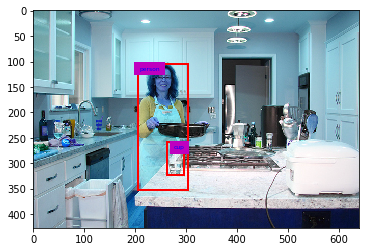

In [227]:
proposals = []
proposals.append(union_boxes[index_test])
proposals.append(obj_boxes[index_test])
proposals.append(sub_boxes[index_test])

classes = []
classes.append(relation)
classes.append(categories[int(obj_labes[index_test]) - 1])
classes.append(categories[int(sub_labes[index_test]) - 1])

visualize(im_pixels, proposals, classes)

In [228]:
categories[int(obj_labes[index_test]) - 1]

'cup'

In [229]:
relation

'holding'

In [230]:
categories[int(sub_labes[index_test]) - 1]

'person'